In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#User Data – This dataset contains information of users from a social networking site. 
#It contains information about UserID, Gender, Age, EstimatedSalary, Purchased. 
#We are using this dataset for predicting that a user will purchase the company’s newly launched product or not
dataset = pd.read_csv('User_Data.csv')  # dataframe dataset to upload the csv file.

In [3]:
#Check null values
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
#check data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
#check statistics of dataset
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Purchased', ylabel='count'>

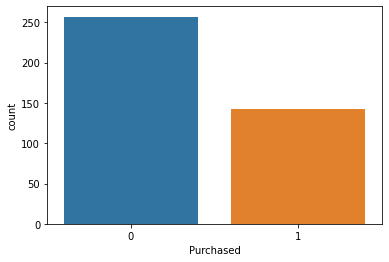

In [6]:
#get count of label (0 and 1)
import seaborn as sns
label = dataset['Purchased']
sns.countplot(label)

In [7]:
#first five rows
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
#Extracting Independent and dependent Variable  
x = dataset.iloc[:, [2, 3]].values

y = dataset.iloc[:, 4].values

In [9]:
#Splitting the dataset to train and test. 75% of data is used for training the model and 
# 25% of it is used to test the performance of our model.

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
        x, y, test_size = 0.25, random_state = 0)

In [10]:
#Now, it is very important to perform feature scaling here because Age 
#and Estimated Salary values lie in different ranges.
#If we don’t scale the features then Estimated Salary feature will dominate Age feature 
#when the model finds the nearest neighbor to a data point in data space.
# fit - traiing learning from the data mean and standard deviation
# transform will apply the changes to data (x-mean)/(std)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)
  
print (xtrain[0:10, :])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [11]:
xtrain1 = pd.DataFrame(xtrain , columns = ['Age','Salary'])
xtrain1.describe()

,Age,Salary
count,3.000000e+02,3.000000e+02
mean,1.458093e-16,1.509903e-16
std,1.001671e+00,1.001671e+00
min,-1.993189e+00,-1.582542e+00
25%,-7.305279e-01,-7.707344e-01
50%,-1.254409e-02,-2.416095e-03
75%,7.797139e-01,5.339571e-01
max,2.166165e+00,2.331532e+00


In [12]:
#Training our Logistic Regression model.
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [13]:
#prediction on testing data.
y_pred = classifier.predict(xtest)

In [14]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[65  3]
 [ 8 24]]


In [15]:
#Performance measure – Accuracy
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))


Accuracy :  0.89


In [16]:
#include gender also in independent variable
X = dataset.iloc[:, [1, 2, 3]].values
y = dataset.iloc[:, -1].values

In [17]:
#Since our dataset containing character variables we have to encode it using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [18]:
print (X[0:10, :])

[[1 19 19000]
 [1 35 20000]
 [0 26 43000]
 [0 27 57000]
 [1 19 76000]
 [1 27 58000]
 [0 27 84000]
 [0 32 150000]
 [1 25 33000]
 [0 35 65000]]


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
#Training our Logistic Regression model.
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [22]:
#prediction on testing data.
y_pred = classifier.predict(X_test)

In [23]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[56  2]
 [ 5 17]]


In [24]:
#Performance measure – Accuracy
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9125


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80

